# Natural Language Processing

## Importing the libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/aiml/superDataScience/colab2/SDS-CP016-news-article-classification/notebooks/yasuko-gallagher/bbc_news_text_complexity_summarization.csv')

In [4]:
dataset.drop(['no_sentences','Flesch Reading Ease Score','Dale-Chall Readability Score','text_rank_summary','lsa_summary'], axis=1, inplace=True)

In [5]:
dataset.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2127 non-null   object
 1   labels  2127 non-null   object
dtypes: object(2)
memory usage: 33.4+ KB


In [7]:
dataset['labels'].value_counts()

,count
labels,
sport,505
business,503
politics,403
entertainment,369
tech,347


In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<ipython-input-14-6ba1548850ae>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


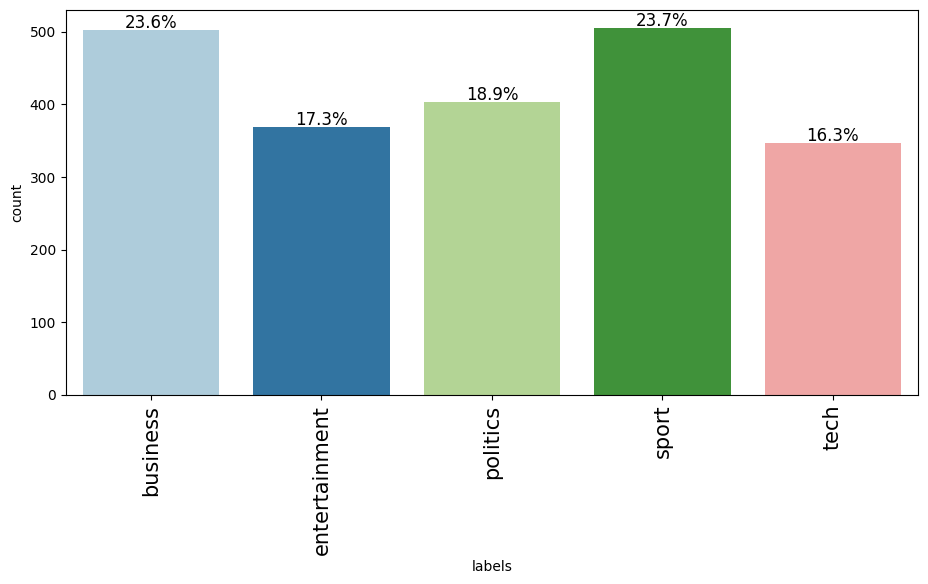

In [16]:
labeled_barplot(dataset, "labels", perc=True, n=10)

Sport category has the most (23.7%) followed by business category (23.6%). The rest of three categories have less data and it could cause some issue.  

## Cleaning the texts

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 2127):
  review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus

## Creating the Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2127)
X = cv.fit_transform(corpus).toarray()

In [ ]:
print(X.shape)
print(len(y))

(2127, 2127)
2127


In [ ]:
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['entertainment' 'entertainment']
 ['sport' 'sport']
 ['politics' 'politics']
 ['business' 'business']
 ['sport' 'sport']
 ['entertainment' 'entertainment']
 ['entertainment' 'business']
 ['sport' 'sport']
 ['business' 'business']
 ['sport' 'sport']
 ['business' 'business']
 ['sport' 'sport']
 ['politics' 'politics']
 ['business' 'business']
 ['politics' 'politics']
 ['tech' 'tech']
 ['business' 'business']
 ['tech' 'tech']
 ['entertainment' 'entertainment']
 ['sport' 'sport']
 ['entertainment' 'entertainment']
 ['tech' 'tech']
 ['politics' 'politics']
 ['business' 'business']
 ['entertainment' 'entertainment']
 ['business' 'business']
 ['entertainment' 'entertainment']
 ['business' 'business']
 ['sport' 'sport']
 ['business' 'business']
 ['business' 'business']
 ['politics' 'politics']
 ['business' 'business']
 ['entertainment' 'entertainment']
 ['politics' 'politics']
 ['business' 'business']
 ['politics' 'politics']
 ['tech' 'tech']
 ['politics' 'politics']
 ['tech' 'tech']
 ['busi

In [ ]:
print(y_pred)

['entertainment' 'sport' 'politics' 'business' 'sport' 'entertainment'
 'entertainment' 'sport' 'business' 'sport' 'business' 'sport' 'politics'
 'business' 'politics' 'tech' 'business' 'tech' 'entertainment' 'sport'
 'entertainment' 'tech' 'politics' 'business' 'entertainment' 'business'
 'entertainment' 'business' 'sport' 'business' 'business' 'politics'
 'business' 'entertainment' 'politics' 'business' 'politics' 'tech'
 'politics' 'tech' 'business' 'sport' 'tech' 'entertainment' 'politics'
 'politics' 'tech' 'tech' 'tech' 'business' 'politics' 'business' 'sport'
 'tech' 'sport' 'politics' 'politics' 'politics' 'tech' 'sport' 'business'
 'sport' 'tech' 'tech' 'entertainment' 'politics' 'tech' 'politics'
 'business' 'sport' 'politics' 'business' 'business' 'business'
 'entertainment' 'entertainment' 'tech' 'business' 'business' 'business'
 'entertainment' 'tech' 'politics' 'business' 'politics' 'politics'
 'sport' 'sport' 'tech' 'sport' 'business' 'politics' 'sport' 'business'
 'tech

In [ ]:
print(y_test)

['entertainment' 'sport' 'politics' 'business' 'sport' 'entertainment'
 'business' 'sport' 'business' 'sport' 'business' 'sport' 'politics'
 'business' 'politics' 'tech' 'business' 'tech' 'entertainment' 'sport'
 'entertainment' 'tech' 'politics' 'business' 'entertainment' 'business'
 'entertainment' 'business' 'sport' 'business' 'business' 'politics'
 'business' 'entertainment' 'politics' 'business' 'politics' 'tech'
 'politics' 'tech' 'business' 'sport' 'tech' 'entertainment' 'politics'
 'politics' 'tech' 'tech' 'tech' 'business' 'politics' 'business' 'sport'
 'tech' 'sport' 'politics' 'politics' 'business' 'business' 'sport'
 'business' 'sport' 'tech' 'tech' 'entertainment' 'politics' 'tech'
 'politics' 'business' 'sport' 'politics' 'business' 'business' 'business'
 'entertainment' 'entertainment' 'tech' 'business' 'business' 'business'
 'entertainment' 'tech' 'politics' 'business' 'politics' 'politics'
 'sport' 'sport' 'tech' 'sport' 'business' 'politics' 'sport' 'business'
 'tech'

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[101   2   2   0   2]
 [  0  67   1   0   0]
 [  1   0  83   0   2]
 [  0   0   0  93   0]
 [  0   0   1   0  71]]


0.9741784037558685

The accracy of BOW shows very high (97%). It will be interesting to compare other classification methods.